In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")

In [46]:

class Zscore:

    def __init__(self, np_columns: np.ndarray):
        np_columns = np_columns[~np.isnan(np_columns).any(axis=1)]
        self.data = np_columns
        self.means = np.nanmean(self.data, axis=0)
        self.stds = np.nanstd(self.data, axis=0)

    @staticmethod
    def get_single_score(np_column: np.ndarray):
        np_column = np_column[~np.isnan(np_column)].astype(float)
        return np.abs((np_column - np.nanmean(np_column)) / np.nanstd(np_column))

    def get_score(self):
        return np.abs((self.data - self.means) / self.stds)

    def get_average_score(self):
        z = self.get_score()
        return np.nanmean(z, axis=1)


In [5]:
X = penguins[['bill_depth_mm','flipper_length_mm','body_mass_g']].to_numpy()

In [54]:
zsc = Zscore(X)

single_score_body_mass_g = Zscore.get_single_score(penguins['body_mass_g'].to_numpy())
single_score_flipper_length = Zscore.get_single_score(penguins['flipper_length_mm'].to_numpy())
single_score_bill_depth = Zscore.get_single_score(penguins['bill_depth_mm'].to_numpy())

agg_scores = zsc.get_average_score()

# Знайдемо нетипові
threshold = 3

body_mass_g_outliers = np.where(single_score_body_mass_g > threshold)[0]
flipper_length_outliers = np.where(single_score_flipper_length > threshold)[0]
bill_depth_outliers = np.where(single_score_bill_depth > threshold)[0]

outliers = np.where(agg_scores > threshold)[0]

# Якщо <5, беремо топ-5 за Z-score
if len(outliers) < 5:
    outliers = np.argsort(agg_scores)[-10:]

if len(body_mass_g_outliers) < 5:
    body_mass_g_outliers = np.argsort(single_score_body_mass_g)[-10:]

if len(flipper_length_outliers) < 5:
    flipper_length_outliers = np.argsort(single_score_flipper_length)[-10:]

if len(bill_depth_outliers) < 5:
    bill_depth_outliers = np.argsort(single_score_bill_depth)[-10:]

print("Outlier indices:", outliers)
print("body_mass_g outliers:", body_mass_g_outliers)
print("flipper_length_mm outliers:", flipper_length_outliers)
print("bill_depth_mm outliers:", bill_depth_outliers)

Outlier indices: []
body_mass_g outliers: []
flipper_length_mm outliers: []
bill_depth_mm outliers: []


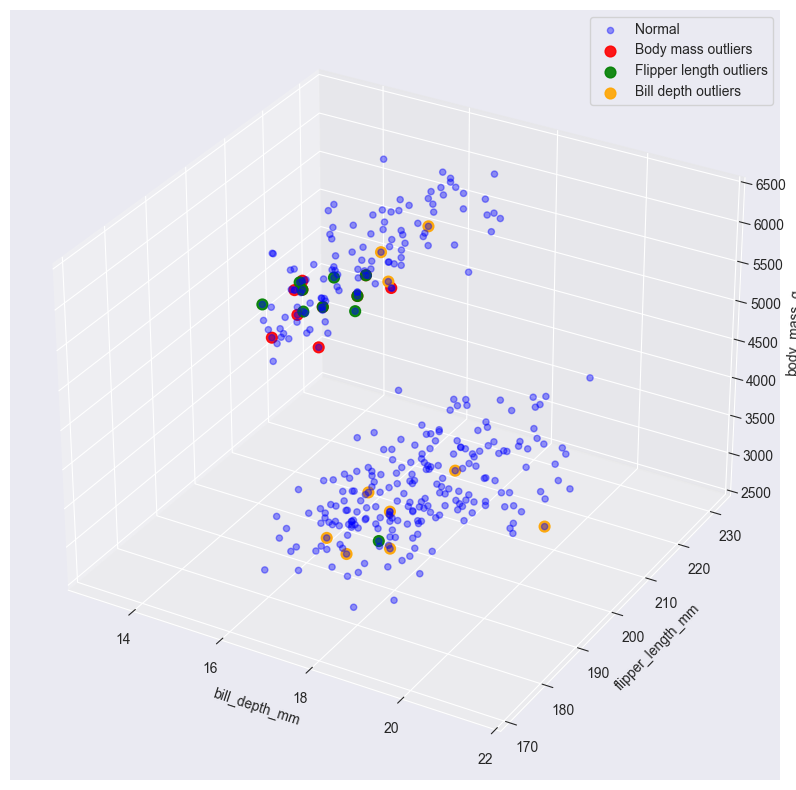

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# Normal
ax.scatter(penguins["bill_depth_mm"],
           penguins["flipper_length_mm"],
           penguins["body_mass_g"],
           c="blue", alpha=0.4, label="Normal")

# Body mass outliers
ax.scatter(penguins["bill_depth_mm"].iloc[body_mass_g_outliers],
           penguins["flipper_length_mm"].iloc[body_mass_g_outliers],
           penguins["body_mass_g"].iloc[body_mass_g_outliers],
           c="red", s=60, label="Body mass outliers", alpha=0.9)

# Flipper length outliers
ax.scatter(penguins["bill_depth_mm"].iloc[flipper_length_outliers],
           penguins["flipper_length_mm"].iloc[flipper_length_outliers],
           penguins["body_mass_g"].iloc[flipper_length_outliers],
           c="green", s=60, label="Flipper length outliers", alpha=0.9)

# Bill depth outliers
ax.scatter(penguins["bill_depth_mm"].iloc[bill_depth_outliers],
           penguins["flipper_length_mm"].iloc[bill_depth_outliers],
           penguins["body_mass_g"].iloc[bill_depth_outliers],
           c="orange", s=60, label="Bill depth outliers", alpha=0.9)

ax.set_xlabel("bill_depth_mm")
ax.set_ylabel("flipper_length_mm")
ax.set_zlabel("body_mass_g")
ax.legend()
plt.show()




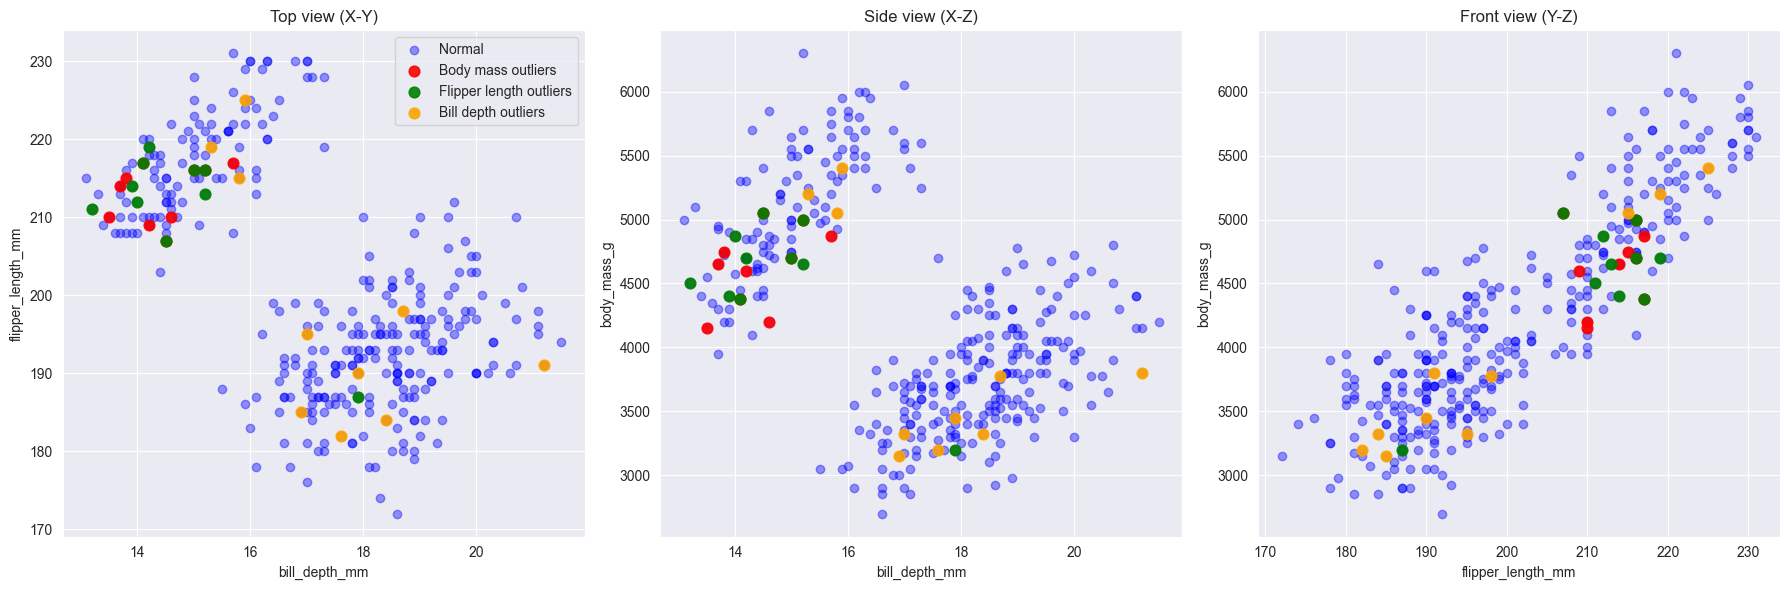

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Вид зверху (bill_depth_mm vs flipper_length_mm)
axes[0].scatter(penguins["bill_depth_mm"], penguins["flipper_length_mm"], c="blue", alpha=0.4, label="Normal")
axes[0].scatter(penguins["bill_depth_mm"].iloc[body_mass_g_outliers],
                penguins["flipper_length_mm"].iloc[body_mass_g_outliers],
                c="red", s=60, label="Body mass outliers", alpha=0.9)
axes[0].scatter(penguins["bill_depth_mm"].iloc[flipper_length_outliers],
                penguins["flipper_length_mm"].iloc[flipper_length_outliers],
                c="green", s=60, label="Flipper length outliers", alpha=0.9)
axes[0].scatter(penguins["bill_depth_mm"].iloc[bill_depth_outliers],
                penguins["flipper_length_mm"].iloc[bill_depth_outliers],
                c="orange", s=60, label="Bill depth outliers", alpha=0.9)
axes[0].set_xlabel("bill_depth_mm")
axes[0].set_ylabel("flipper_length_mm")
axes[0].set_title("Top view (X-Y)")

# Вид збоку (bill_depth_mm vs body_mass_g)
axes[1].scatter(penguins["bill_depth_mm"], penguins["body_mass_g"], c="blue", alpha=0.4, label="Normal")
axes[1].scatter(penguins["bill_depth_mm"].iloc[body_mass_g_outliers],
                penguins["body_mass_g"].iloc[body_mass_g_outliers],
                c="red", s=60, alpha=0.9)
axes[1].scatter(penguins["bill_depth_mm"].iloc[flipper_length_outliers],
                penguins["body_mass_g"].iloc[flipper_length_outliers],
                c="green", s=60, alpha=0.9)
axes[1].scatter(penguins["bill_depth_mm"].iloc[bill_depth_outliers],
                penguins["body_mass_g"].iloc[bill_depth_outliers],
                c="orange", s=60, alpha=0.9)
axes[1].set_xlabel("bill_depth_mm")
axes[1].set_ylabel("body_mass_g")
axes[1].set_title("Side view (X-Z)")

# Інший бік (flipper_length_mm vs body_mass_g)
axes[2].scatter(penguins["flipper_length_mm"], penguins["body_mass_g"], c="blue", alpha=0.4, label="Normal")
axes[2].scatter(penguins["flipper_length_mm"].iloc[body_mass_g_outliers],
                penguins["body_mass_g"].iloc[body_mass_g_outliers],
                c="red", s=60, alpha=0.9)
axes[2].scatter(penguins["flipper_length_mm"].iloc[flipper_length_outliers],
                penguins["body_mass_g"].iloc[flipper_length_outliers],
                c="green", s=60, alpha=0.9)
axes[2].scatter(penguins["flipper_length_mm"].iloc[bill_depth_outliers],
                penguins["body_mass_g"].iloc[bill_depth_outliers],
                c="orange", s=60, alpha=0.9)
axes[2].set_xlabel("flipper_length_mm")
axes[2].set_ylabel("body_mass_g")
axes[2].set_title("Front view (Y-Z)")

# Додаємо легенду тільки на першому графіку
axes[0].legend()
plt.tight_layout()
plt.show()


Агреговані аномалії

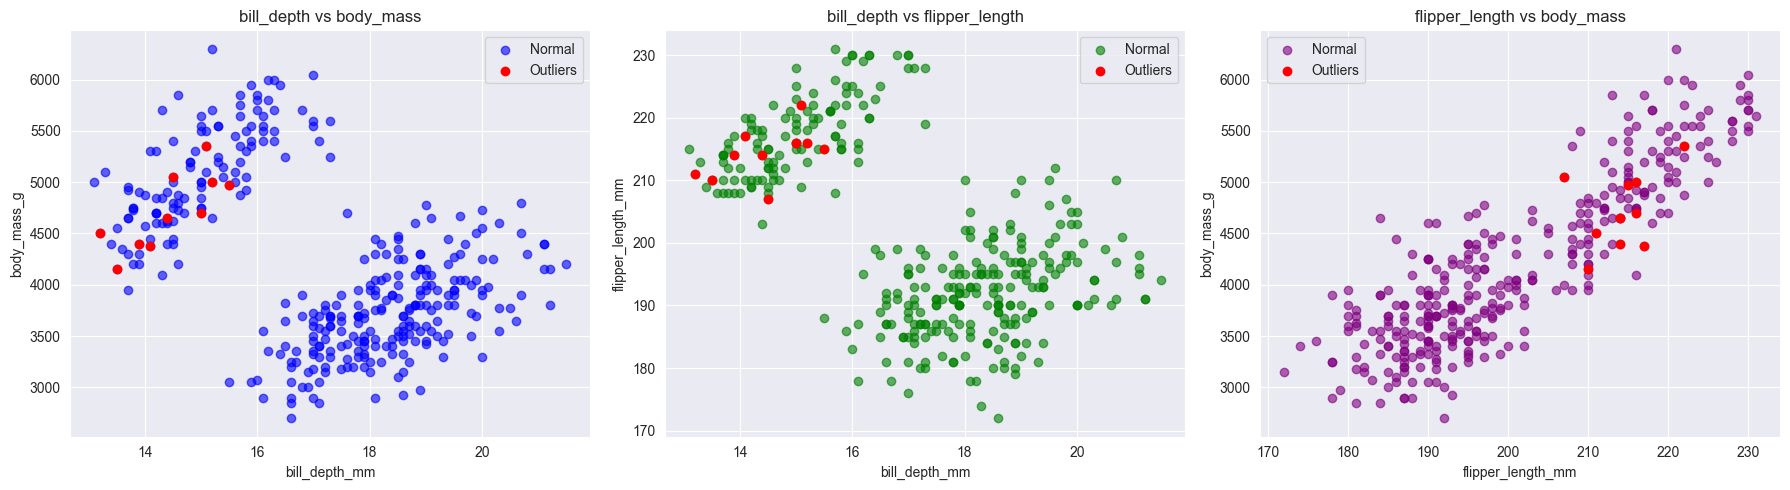

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. bill_depth_mm vs body_mass_g
axes[0].scatter(X[:,0], X[:,2], c="blue", alpha=0.6, label="Normal")
axes[0].scatter(X[outliers,0], X[outliers,2], c="red", label="Outliers")
axes[0].set_xlabel("bill_depth_mm")
axes[0].set_ylabel("body_mass_g")
axes[0].legend()
axes[0].set_title("bill_depth vs body_mass")

# 2. bill_depth_mm vs flipper_length_mm
axes[1].scatter(X[:,0], X[:,1], c="green", alpha=0.6, label="Normal")
axes[1].scatter(X[outliers,0], X[outliers,1], c="red", label="Outliers")
axes[1].set_xlabel("bill_depth_mm")
axes[1].set_ylabel("flipper_length_mm")
axes[1].legend()
axes[1].set_title("bill_depth vs flipper_length")

# 3. flipper_length_mm vs body_mass_g
axes[2].scatter(X[:,1], X[:,2], c="purple", alpha=0.6, label="Normal")
axes[2].scatter(X[outliers,1], X[outliers,2], c="red", label="Outliers")
axes[2].set_xlabel("flipper_length_mm")
axes[2].set_ylabel("body_mass_g")
axes[2].legend()
axes[2].set_title("flipper_length vs body_mass")

plt.tight_layout()
plt.show()


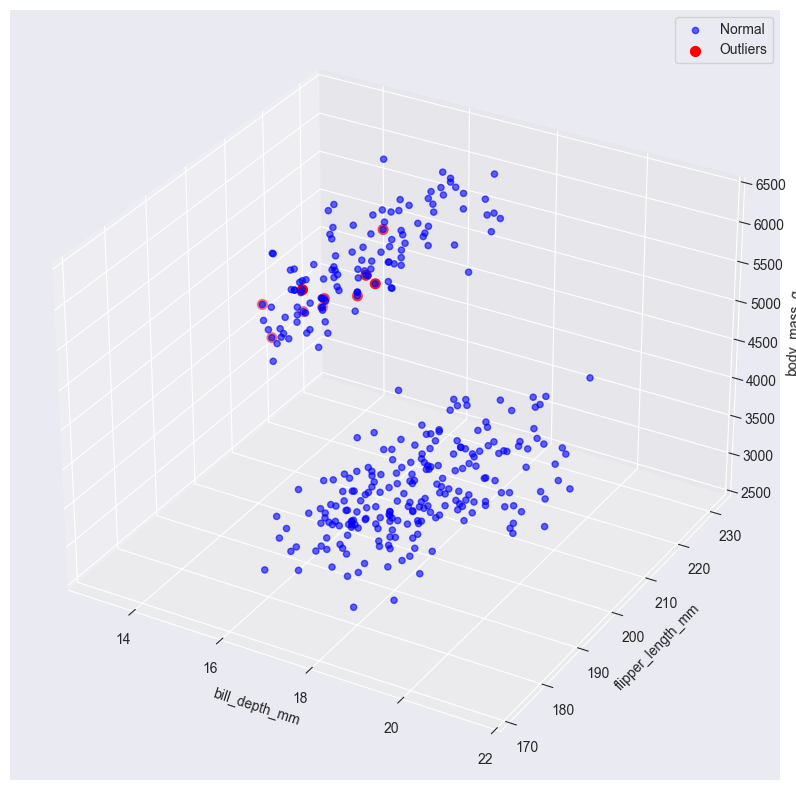

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c="blue", alpha=0.6, label="Normal")
ax.scatter(X[outliers,0], X[outliers,1], X[outliers,2], c="red", label="Outliers", s=50)
ax.set_xlabel("bill_depth_mm")
ax.set_ylabel("flipper_length_mm")
ax.set_zlabel("body_mass_g")
plt.legend()
plt.show()